# The picking notebook 
This notebook aims to show how to extract the first arrival times from a shot gather.

**Author:** Alberto Carrera

## 1. Import Libraries and Load Data

Load data from SEG2, SEGY, or DAT files using SWAutils.

Extract:
- Seismic data array (`nsamples × ntraces`)
- Sampling interval (`SR`)
- Receiver positions (`x`)

In [1]:
import matplotlib.pyplot as plt
import SRTutils as srt
import numpy as np

filename = "Shot1.dat"
#filename = input("Enter the filename {}:")
datadir = "../data/"  # Folder path for data
figdir = '../figures/'

# Load seismic stream
data, SR, x = srt.load_stream(filename, datadir)

#print(f"Receiver positions (m): {x}")
print(f"Shot gather dimensions: {data.shape}")
print(f"Sampling rate: {SR} s")

📁 Directory created: ../data/fb/
▶ Receiver positions extracted from SEG2 header.
Shot gather dimensions: (4000, 24)
Sampling rate: 0.00025 s


/home/alberto/anaconda3/envs/swa/lib/python3.9/site-packages/obspy/io/seg2/seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


## 2. Data Visualization

### 2a. Wiggle Plot
Plot traces with offsets and filled positive/negative amplitudes.

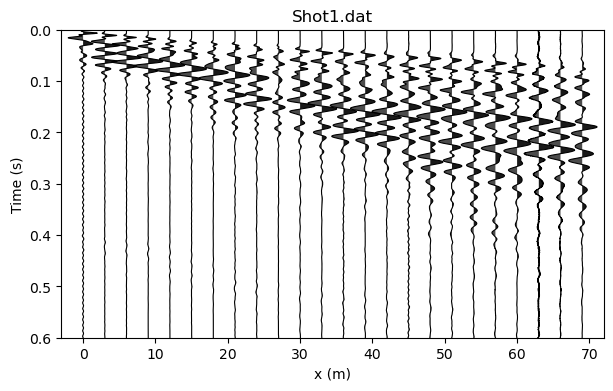

In [2]:
fig, ax = plt.subplots(figsize=(7, 4))
srt.wiggle(data, SR=SR, xx=x, ax=ax)
ax.set_title(filename)
ax.set_ylim(0.6, 0)
plt.show()

#data = np.fliplr(data)

## 3. Interactive Fisrt Arrivals Picking 
Pick the first arrival time at each channel

In [3]:
# ## 3. Interactive First Arrival Picking
import matplotlib
matplotlib.use('TkAgg')  # per interattività locale (puoi togliere se usi notebook con widget)

# --- PICKING INTERATTIVO DEI PRIMI ARRIVI ---
picks, x_pick, t_pick, ax = srt.pick_fb(data, SR, x, filename, ylim=(0.2, 0))
plt.show()

👉 Clicca sui primi arrivi (premi ENTER per terminare)
✅ 24 punti selezionati.


## 4. Extract and Save 
Now we generate and save a .txt file from picked points

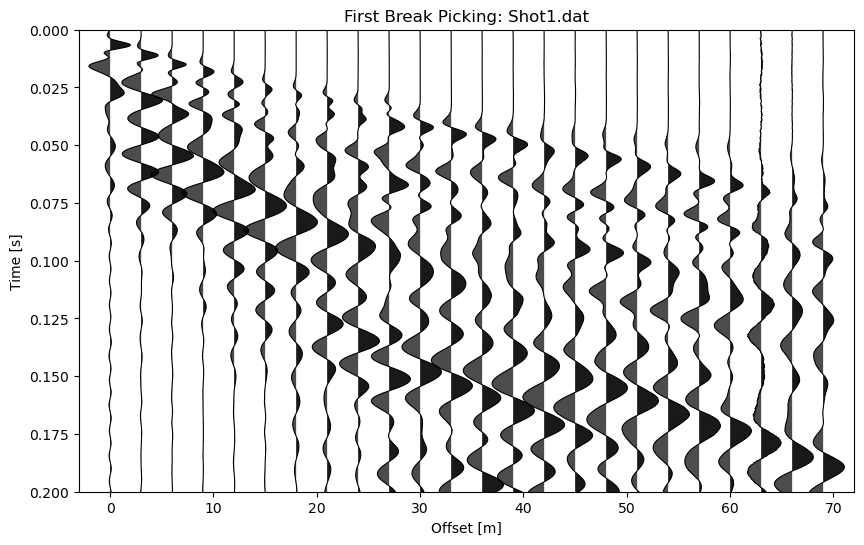

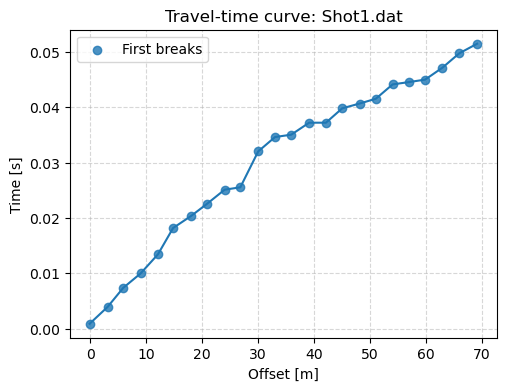

📂 First-break be saved in: ../data/fb/Shot1_fb.txt


In [4]:
%matplotlib inline

df, fig, ax = srt.extract_fb(x_pick, t_pick, filename)

Finally we pick-up the file and inspect our picks on the wiggle plot

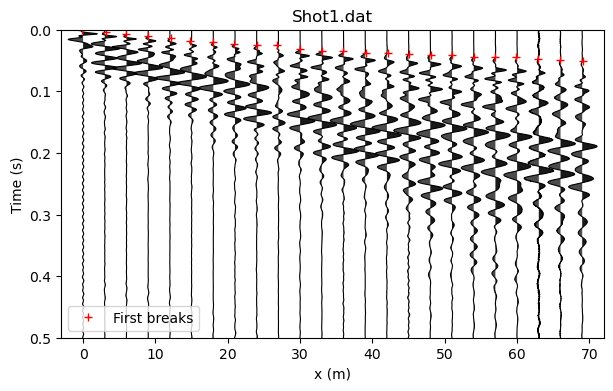

,x(m),t(s)
0,-0.096774,0.000866
1,3.096774,0.003896
2,5.903226,0.007359
3,9.000000,0.009957
4,12.096774,0.013420


In [5]:
import pandas as pd
df = pd.read_csv("../data/fb/"+filename[:-4]+'_fb.txt')

fig, ax = plt.subplots(figsize=(7, 4))
srt.wiggle(data, SR=SR, xx=x, ax=ax)
ax.plot(df['x(m)'], df['t(s)'], 'r+', markersize=6, label="First breaks")
ax.set_title(filename)
ax.set_ylim(0.5, 0)
ax.legend(loc='lower left')
plt.show()

df.head()

## 5. Create .sgt input file
After the picking of the entire dataset (i.e., different shot gathers collected at different shot positions along the profile), you need to create the final output file.  
Since we will use `pyGIMLi` for the tomography analysis, the output file is a spreadsheet (default extension .sgt, which stands for 'shot-geophone-time') with this structure:

<img src="../figures/sgt.jpg" style="width:70%; display:block; margin:auto;"/>

(image from [Steiner et al., 2023](https://doi.org/10.1016/j.cageo.2023.105339))  


The `pyGIMLi` RefractionManager addresses the stations in consecutive order, based on the station numbers in the geometry file. The shot index numbers (SIN) and receiver index numbers (RIN) are assigned to the shot and receiver stations separately.  
The [data file](https://github.com/gimli-org/example-data/blob/master/traveltime/koenigsee.sgt) cointains first the shot/geophone number and positions (x, y) and subsequently the measurements (s, g, t)